In [1]:
% matplotlib inline

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
!ls ./data/

advanced_basic.csv    coach_season.csv      single.csv
advanced_shooting.csv player_playoff.csv    team_playoff.csv
avg.csv               player_salary.csv     team_season.csv
coach_playoff.csv     player_season.csv     tot.csv


In [3]:
team_season = pd.read_csv('./data/team_season.csv')
team_season.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,罚球出手,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分
0,CHI,1985-10-25,W,主,CLE115-116CHI,0.453,43,95,0.250,1,...,41,53,21,32,29,8,8,20,33,116
1,CHI,1985-10-26,W,主,DET118-121CHI,0.460,40,87,0.667,2,...,45,46,17,29,18,6,11,20,33,121
2,CHI,1985-10-29,W,客,GSW105-111CHI,0.489,45,92,0.000,0,...,26,46,13,33,24,6,5,14,27,111
3,CHI,1985-10-31,L,客,LAC120-112CHI,0.454,44,97,0.000,0,...,28,40,17,23,22,10,9,14,28,112
4,CHI,1985-11-02,L,客,NAN118-100CHI,0.417,35,84,0.250,1,...,34,40,15,25,18,4,3,22,30,100


In [4]:
team_playoff = pd.read_csv('./data/team_playoff.csv')
team_playoff.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,罚球出手,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分
0,CHI,1986-04-17,L,客,BOS123-104CHI,0.488,42,86,0.500,1,...,23,30,11,19,17,8,2,17,30,104
1,CHI,1986-04-20,L,客,BOS135-131CHI,0.461,47,102,0.000,0,...,46,44,14,30,15,9,4,11,34,131
2,CHI,1986-04-22,L,主,BOS122-104CHI,0.438,39,89,0.250,1,...,36,45,16,29,19,7,5,15,28,104
3,CHI,1987-04-23,L,客,BOS108-104CHI,0.487,38,78,0.333,1,...,28,30,8,22,26,5,3,9,22,104
4,CHI,1987-04-26,L,客,BOS105-96CHI,0.442,34,77,0.571,4,...,28,38,12,26,14,1,4,15,25,96


In [5]:
team_playoff.columns

Index(['球队', '时间', '结果', '主/客场', '比分', '投篮', '命中', '出手', '三分', '三分命中', '三分出手',
       '罚球', '罚球命中', '罚球出手', '篮板', '前场', '后场', '助攻', '抢断', '盖帽', '失误', '犯规',
       '得分'],
      dtype='object')

In [6]:
def convert_time_to_season(s):
    assert type(s) == str
    return int(s[:4])

def get_loss_score(s):
    assert type(s) == str
    index_of_divider = s.index('-')
    loss_score = int(s[:index_of_divider][3:])
    return loss_score

In [7]:
team_playoff['失分'] = team_playoff['比分'].map(get_loss_score)
team_playoff['赛季'] = team_playoff['时间'].map(convert_time_to_season)
team_playoff['回合'] = (team_playoff['出手'] + 0.44 * team_playoff['罚球出手'] - 0.96 * team_playoff['前场'] + team_playoff['失误']) / 2
team_playoff.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,后场,助攻,抢断,盖帽,失误,犯规,得分,失分,赛季,回合
0,CHI,1986-04-17,L,客,BOS123-104CHI,0.488,42,86,0.500,1,...,19,17,8,2,17,30,104,123,1986,51.28
1,CHI,1986-04-20,L,客,BOS135-131CHI,0.461,47,102,0.000,0,...,30,15,9,4,11,34,131,135,1986,59.90
2,CHI,1986-04-22,L,主,BOS122-104CHI,0.438,39,89,0.250,1,...,29,19,7,5,15,28,104,122,1986,52.24
3,CHI,1987-04-23,L,客,BOS108-104CHI,0.487,38,78,0.333,1,...,22,26,5,3,9,22,104,108,1987,45.82
4,CHI,1987-04-26,L,客,BOS105-96CHI,0.442,34,77,0.571,4,...,26,14,1,4,15,25,96,105,1987,46.40


In [8]:
team_season['失分'] = team_season['比分'].map(get_loss_score)
team_season['赛季'] = team_season['时间'].map(convert_time_to_season)
team_season['回合'] = (team_season['出手'] + 0.44 * team_season['罚球出手'] - 0.96 * team_season['前场'] + team_season['失误']) / 2
team_season.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,后场,助攻,抢断,盖帽,失误,犯规,得分,失分,赛季,回合
0,CHI,1985-10-25,W,主,CLE115-116CHI,0.453,43,95,0.250,1,...,32,29,8,8,20,33,116,115,1985,56.44
1,CHI,1985-10-26,W,主,DET118-121CHI,0.460,40,87,0.667,2,...,29,18,6,11,20,33,121,118,1985,55.24
2,CHI,1985-10-29,W,客,GSW105-111CHI,0.489,45,92,0.000,0,...,33,24,6,5,14,27,111,105,1985,52.48
3,CHI,1985-10-31,L,客,LAC120-112CHI,0.454,44,97,0.000,0,...,23,22,10,9,14,28,112,120,1985,53.50
4,CHI,1985-11-02,L,客,NAN118-100CHI,0.417,35,84,0.250,1,...,25,18,4,3,22,30,100,118,1985,53.28


In [9]:
champions = {}

for year in range(1986, 2017):
    current_playoff = team_playoff[team_playoff['赛季'] == year]
    current_win = 0
    single_playoff = {}
    for i in range(len(current_playoff)):
        if current_playoff.iloc[i]['结果'] == 'W':
            if current_playoff.iloc[i]['球队'] in single_playoff.keys():
                single_playoff[current_playoff.iloc[i]['球队']] += 1
            else:
                single_playoff[current_playoff.iloc[i]['球队']] = 1
    for team in single_playoff.keys():
        if single_playoff[team] > current_win:
            current_win = single_playoff[team]
            champions[year] = team

champions

{1986: 'BOS',
 1987: 'LAL',
 1988: 'LAL',
 1989: 'DET',
 1990: 'DET',
 1991: 'CHI',
 1992: 'CHI',
 1993: 'CHI',
 1994: 'HOU',
 1995: 'HOU',
 1996: 'CHI',
 1997: 'CHI',
 1998: 'CHI',
 1999: 'SAS',
 2000: 'LAL',
 2001: 'LAL',
 2002: 'LAL',
 2003: 'SAS',
 2004: 'DET',
 2005: 'SAS',
 2006: 'MIA',
 2007: 'SAS',
 2008: 'BOS',
 2009: 'LAL',
 2010: 'LAL',
 2011: 'DAL',
 2012: 'MIA',
 2013: 'MIA',
 2014: 'SAS',
 2015: 'GSW',
 2016: 'CLE'}

In [10]:
champion_series = pd.Series(champions)

In [11]:
champions_count = champion_series.value_counts()
champions_count.sort_values(ascending=False, inplace=True)
champions_count

LAL    7
CHI    6
SAS    5
MIA    3
DET    3
BOS    2
HOU    2
GSW    1
CLE    1
DAL    1
dtype: int64

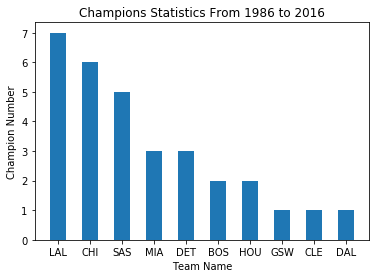

In [12]:
plt.bar(np.arange(10), champions_count.values, width=0.5)
plt.xticks(np.arange(10), list(champions_count.index))
plt.xlabel('Team Name')
plt.ylabel('Champion Number')
plt.title('Champions Statistics From 1986 to 2016')

#### 得到的信息

* 湖人队得到的总冠军最多，有7个，是两个二连冠和一个三连冠
* 公牛队的6个冠军是由两个三连冠组成
* 马刺队得到了排行第3的5个冠军，但是从未成功卫冕
* 得到冠军最多的前3支球队是湖人，公牛，马刺，包揽了超过一半的冠军
* 历史上得到总冠军最多的球队是凯尔特人，但是自1986年起，仅获得了两个冠军

In [13]:
champion_score = []
champion_loss = []

for year in range(1986, 2017):
    champion = champions[year]
    champion_score.append(team_playoff[(team_playoff['球队'] == champion) & (team_playoff['赛季'] == year)]['得分'].mean())
    champion_loss.append(-1 * team_playoff[(team_playoff['球队'] == champion) & (team_playoff['赛季'] == year)]['失分'].mean())

In [14]:
champion_teams = list(champion_series.values)

for i in range(31):
    champion_teams[i] = str(i + 1986) + ' ' + champion_teams[i]

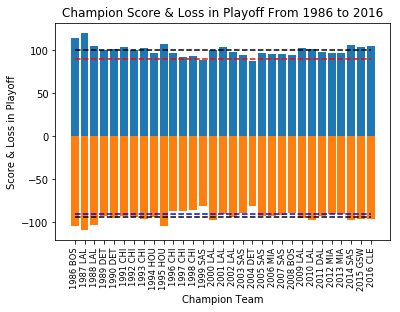

In [15]:
plt.bar(np.arange(31), champion_score, label='score')
plt.bar(np.arange(31), champion_loss, label='loss')
plt.hlines(np.array(champion_score).mean(), 0, 30, linestyles='dashed')
plt.hlines(90, 0, 30, linestyles='dashed', colors='red')
plt.hlines(np.array(champion_loss).mean(), 0, 30, linestyles='dashed')
plt.hlines(-90, 0, 30, linestyles='dashed', colors='blue')
plt.xticks(np.arange(31), champion_teams, size='small', rotation=90)
# plt.legend(loc='upper right')
plt.xlabel('Champion Team')
plt.ylabel('Score & Loss in Playoff')
plt.title('Champion Score & Loss in Playoff From 1986 to 2016')

#### 得到的信息

* 仅有两支冠军队伍夺冠年的季后赛场均得分没有超过90分，是1999年的马刺和2004年的活塞
* 2005年的总冠军马刺的场均得分超过了90分，但当年的总决赛票房非常低，是由于其总决赛的对手是去年的冠军活塞，历史场均得分最低的冠军
* 场均得分最高的是1987年的湖人，但是其场均失分也非常高，可能是球队偏向进攻的缘故，但也有可能是当时联盟的节奏偏快而导致

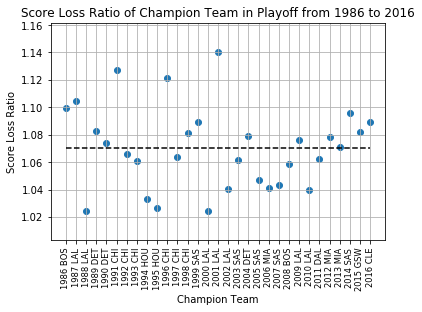

In [16]:
score_loss_ratio = []
for i in range(31):
    score_loss_ratio.append(abs(champion_score[i] / champion_loss[i]))

plt.scatter(np.arange(31), score_loss_ratio)
plt.hlines(np.array(score_loss_ratio).mean(), 0, 30, linestyles='dashed')
plt.xticks(np.arange(31), champion_teams, size='small', rotation=90)
plt.xlabel('Champion Team')
plt.ylabel('Score Loss Ratio')
plt.title('Score Loss Ratio of Champion Team in Playoff from 1986 to 2016')
plt.grid(True)

#### 得到的信息

* 得失分比最大的是2001年冠军湖人，而其当年的季后赛战绩为15-1，自2017年之前的联盟最佳季后赛战绩
* 而2000年和2002年湖人也均是冠军，但是其得失分比距离冠军队伍的平均水准有相当差距
* 主流印象中的96公牛和01湖人非常强的印象是相当准确的，两支队伍在得失分比上分别位列第3和第1
* 2004年冠军活塞的得失分比是超过了平均水准的，尽管其场均得分历史最低，但是其防守排名极为靠前
* 每一支冠军队的季后赛得失分比均在1.02以上

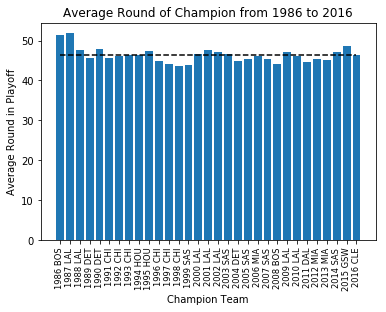

In [17]:
round_count = []

for year in range(1986, 2017):
    champion_team = team_playoff[(team_playoff['赛季'] == year) & (team_playoff['球队'] == champions[year])]
    round_count.append(champion_team['回合'].mean())

plt.bar(np.arange(31), round_count)
plt.xlabel('Champion Team')
plt.ylabel('Average Round in Playoff')
plt.xticks(np.arange(31), champion_teams, size='small', rotation=90)
plt.hlines(np.array(round_count).mean(), 0, 30, linestyles='dashed')
plt.title('Average Round of Champion from 1986 to 2016')

#### 得到的信息

* 1986年的凯尔特人和1987年的湖人是目前节奏最快的两支冠军球队
* 公牛的第一个三连冠时期，球队的节奏刚好是平均水准，而在第二个三连冠时期其节奏出现了明显的下降

In [18]:
shoot = {}

for year in range(1986, 2017):
    shoot[year] = {}
    champion_team = team_playoff[(team_playoff['赛季'] == year) & (team_playoff['球队'] == champions[year])]
    shoot[year]['三分出手'] = champion_team['三分出手'].sum()
    shoot[year]['三分命中'] = champion_team['三分命中'].sum()
    shoot[year]['场均三分出手'] = champion_team['三分出手'].mean()
    shoot[year]['场均三分命中'] = champion_team['三分命中'].mean()
    shoot[year]['场均两分出手'] = champion_team['出手'].mean() - shoot[year]['场均三分出手']
    shoot[year]['场均两分命中'] = champion_team['命中'].mean() - shoot[year]['场均三分命中']
    shoot[year]['出手'] = champion_team['出手'].sum()
    shoot[year]['命中'] = champion_team['命中'].sum()
    shoot[year]['场均出手'] = champion_team['出手'].mean()
    shoot[year]['场均命中'] = champion_team['命中'].mean()
    shoot[year]['两分出手'] = champion_team['出手'].sum() - champion_team['三分出手'].sum()
    shoot[year]['两分命中'] = champion_team['命中'].sum() - champion_team['三分命中'].sum()
    shoot[year]['罚球出手'] = champion_team['罚球出手'].sum()
    shoot[year]['罚球命中'] = champion_team['罚球命中'].sum()
    shoot[year]['罚球命中率'] = shoot[year]['罚球命中'] / shoot[year]['罚球出手']
    shoot[year]['两分命中率'] = shoot[year]['两分命中'] / shoot[year]['两分出手']
    shoot[year]['三分命中率'] = shoot[year]['三分命中'] / shoot[year]['三分出手']
    shoot[year]['得分'] = champion_team['得分'].sum()
    shoot[year]['场均得分'] = champion_team['得分'].mean()
    shoot[year]['真实命中率'] = shoot[year]['得分'] / (2 * (shoot[year]['出手'] + 0.44 * shoot[year]['罚球出手']))

shoot_data = pd.DataFrame(shoot).T
shoot_data

,三分出手,三分命中,三分命中率,两分出手,两分命中,两分命中率,出手,命中,场均三分出手,场均三分命中,场均两分出手,场均两分命中,场均出手,场均命中,场均得分,得分,真实命中率,罚球出手,罚球命中,罚球命中率
1986,115.0,45.0,0.391304,1445.0,746.0,0.516263,1560.0,791.0,6.388889,2.500000,80.277778,41.444444,86.666667,43.944444,114.444444,2060.0,0.572286,545.0,433.0,0.794495
1987,119.0,43.0,0.361345,1426.0,763.0,0.535063,1545.0,806.0,6.611111,2.388889,79.222222,42.388889,85.833333,44.777778,120.555556,2170.0,0.591719,656.0,515.0,0.785061
1988,145.0,57.0,0.393103,1817.0,923.0,0.507980,1962.0,980.0,6.041667,2.375000,75.708333,38.458333,81.750000,40.833333,105.583333,2534.0,0.562072,664.0,517.0,0.778614
1989,142.0,42.0,0.295775,1219.0,602.0,0.493847,1361.0,644.0,8.352941,2.470588,71.705882,35.411765,80.058824,37.882353,100.588235,1710.0,0.540948,499.0,380.0,0.761523
1990,168.0,62.0,0.369048,1470.0,709.0,0.482313,1638.0,771.0,8.400000,3.100000,73.500000,35.450000,81.900000,38.550000,101.750000,2035.0,0.538200,574.0,431.0,0.750871
1991,92.0,30.0,0.326087,1262.0,666.0,0.527734,1354.0,696.0,5.411765,1.764706,74.235294,39.176471,79.647059,40.941176,103.941176,1767.0,0.568943,452.0,345.0,0.763274
1992,145.0,54.0,0.372414,1605.0,798.0,0.497196,1750.0,852.0,6.590909,2.454545,72.954545,36.272727,79.545455,38.727273,100.363636,2208.0,0.546730,612.0,450.0,0.735294
1993,182.0,79.0,0.434066,1380.0,677.0,0.490580,1562.0,756.0,9.578947,4.157895,72.631579,35.631579,82.210526,39.789474,102.368421,1945.0,0.547493,487.0,354.0,0.726899
1994,407.0,149.0,0.366093,1400.0,689.0,0.492143,1807.0,838.0,17.695652,6.478261,60.869565,29.956522,78.565217,36.434783,97.130435,2234.0,0.547141,533.0,409.0,0.767355
1995,483.0,189.0,0.391304,1274.0,660.0,0.518053,1757.0,849.0,21.954545,8.590909,57.909091,30.000000,79.863636,38.590909,107.000000,2354.0,0.579986,619.0,467.0,0.754443


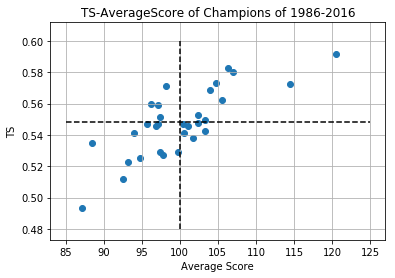

In [19]:
plt.scatter(shoot_data['场均得分'], shoot_data['真实命中率'])
plt.vlines(shoot_data['场均得分'].mean(), 0.48, 0.6, linestyles='dashed')
plt.hlines(shoot_data['真实命中率'].mean(), 85, 125, linestyles='dashed')
plt.xlabel('Average Score')
plt.ylabel('TS')
plt.title('TS-AverageScore of Champions of 1986-2016')
plt.grid(True)

In [20]:
shoot_data.sort_values(by='场均得分', ascending=False).iloc[0].name

1987

In [21]:
shoot_data.sort_values(by='场均得分', ascending=False).iloc[1].name

1986

In [22]:
shoot_data.sort_values(by='场均得分', ascending=True).iloc[0].name

2004

#### 得到的信息

* 此图是进攻向的排行
* 1987年湖人季后赛真实命中率和场均得分均为历史第一，在当时不提倡三分的环境下，这个成就比较惊人，但是也有可能存在节奏加成
* 2004年活塞的冠军的确是凭借防守功力拿下的，在进攻方面仅有不到90的场均得分与不到50%的真实命中率

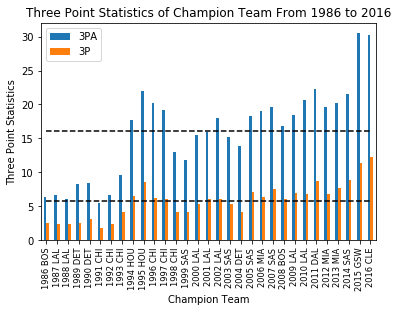

In [23]:
three_of_champions = shoot_data[['场均三分出手', '场均三分命中']]
three_of_champions = three_of_champions.rename(columns={'场均三分出手': '3PA', '场均三分命中': '3P'})
three_of_champions.plot(kind='bar')
plt.hlines(three_of_champions['3PA'].mean(), 0, 30, linestyles='dashed')
plt.hlines(three_of_champions['3P'].mean(), 0, 30, linestyles='dashed')
plt.xticks(np.arange(31), champion_teams, size='small', rotation=90)
plt.xlabel('Champion Team')
plt.ylabel('Three Point Statistics')
plt.title('Three Point Statistics of Champion Team From 1986 to 2016')

#### 得到的信息

* 大趋势上随着年份的推进，三分球的出手数与命中数也逐渐上升
* 2015年勇士与2016年骑士的3分球命中数几乎是1986年凯尔特人与1987、1988年湖人的3分球出手数的两倍
* 在90年代中期出现了一个非常明显的波动，1994年-1996年的冠军队伍（火箭队与公牛队）的三分球出手数相比前后时期有非常明显的提高
* 上述现象可能是由于在1995年到1997年中，联盟将三分线的位置从7.25米缩短到了6.70米

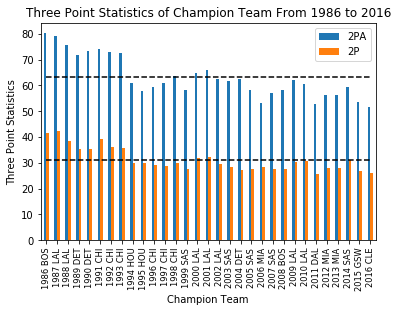

In [24]:
two_of_champions = shoot_data[['场均两分出手', '场均两分命中']]
two_of_champions = two_of_champions.rename(columns={'场均两分出手': '2PA', '场均两分命中': '2P'})
two_of_champions.plot(kind='bar')
plt.hlines(two_of_champions['2PA'].mean(), 0, 30, linestyles='dashed')
plt.hlines(two_of_champions['2P'].mean(), 0, 30, linestyles='dashed')
plt.xticks(np.arange(31), champion_teams, size='small', rotation=90)
plt.xlabel('Champion Team')
plt.ylabel('Three Point Statistics')
plt.title('Three Point Statistics of Champion Team From 1986 to 2016')

#### 得到的信息

* 作为对比，两分球的出手次数自1994年突然下滑之后基本保持稳定，偶有起伏，不过近年来的冠军队伍都非常注重三分。自2002年开始，冠军队伍的两分球出手数均未达到均值

**对上面的资料的整理中，感觉直接通过得失分比进行判断过于粗糙，打算计算百回合得失分后再进行详细比较。**

In [25]:
team_playoff['百回合得分'] = team_playoff['得分'] / (2 * team_playoff['回合']) * 100
team_playoff['百回合失分'] = team_playoff['失分'] / (2 * team_playoff['回合']) * 100

team_playoff.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,抢断,盖帽,失误,犯规,得分,失分,赛季,回合,百回合得分,百回合失分
0,CHI,1986-04-17,L,客,BOS123-104CHI,0.488,42,86,0.500,1,...,8,2,17,30,104,123,1986,51.28,101.404056,119.929797
1,CHI,1986-04-20,L,客,BOS135-131CHI,0.461,47,102,0.000,0,...,9,4,11,34,131,135,1986,59.90,109.348915,112.687813
2,CHI,1986-04-22,L,主,BOS122-104CHI,0.438,39,89,0.250,1,...,7,5,15,28,104,122,1986,52.24,99.540582,116.768760
3,CHI,1987-04-23,L,客,BOS108-104CHI,0.487,38,78,0.333,1,...,5,3,9,22,104,108,1987,45.82,113.487560,117.852466
4,CHI,1987-04-26,L,客,BOS105-96CHI,0.442,34,77,0.571,4,...,1,4,15,25,96,105,1987,46.40,103.448276,113.146552


In [26]:
team_season['百回合得分'] = team_season['得分'] / (2 * team_season['回合']) * 100
team_season['百回合失分'] = team_season['失分'] / (2 * team_season['回合']) * 100

team_season.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,抢断,盖帽,失误,犯规,得分,失分,赛季,回合,百回合得分,百回合失分
0,CHI,1985-10-25,W,主,CLE115-116CHI,0.453,43,95,0.250,1,...,8,8,20,33,116,115,1985,56.44,102.763997,101.878101
1,CHI,1985-10-26,W,主,DET118-121CHI,0.460,40,87,0.667,2,...,6,11,20,33,121,118,1985,55.24,109.522085,106.806662
2,CHI,1985-10-29,W,客,GSW105-111CHI,0.489,45,92,0.000,0,...,6,5,14,27,111,105,1985,52.48,105.754573,100.038110
3,CHI,1985-10-31,L,客,LAC120-112CHI,0.454,44,97,0.000,0,...,10,9,14,28,112,120,1985,53.50,104.672897,112.149533
4,CHI,1985-11-02,L,客,NAN118-100CHI,0.417,35,84,0.250,1,...,4,3,22,30,100,118,1985,53.28,93.843844,110.735736


In [27]:
efficiency = {}

for year in range(1986, 2017):
    efficiency[year] = {}
    champion_team = team_playoff[(team_playoff['赛季'] == year) & (team_playoff['球队'] == champions[year])]
    efficiency[year]['offensive'] = champion_team['百回合得分'].mean()
    efficiency[year]['defensive'] = champion_team['百回合失分'].mean()
    efficiency[year]['ratio'] = efficiency[year]['offensive'] / efficiency[year]['defensive']

efficiency = pd.DataFrame(efficiency).T
efficiency

,defensive,offensive,ratio
1986,101.603629,111.635649,1.098737
1987,105.374519,115.941197,1.100277
1988,108.573607,110.943387,1.021826
1989,101.829869,110.202848,1.082225
1990,98.997879,106.542545,1.076210
1991,101.445775,114.166650,1.125396
1992,101.947999,108.646142,1.065702
1993,104.311382,110.821327,1.062409
1994,101.503049,104.890238,1.033370
1995,110.246708,113.087534,1.025768


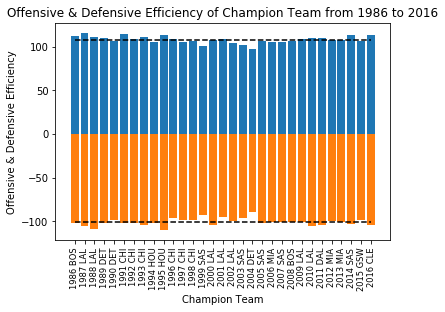

In [28]:
plt.bar(np.arange(31), list(efficiency['offensive'].values))
plt.bar(np.arange(31), list(-1 * efficiency['defensive'].values))
plt.hlines(efficiency['offensive'].mean(), 0, 30, linestyles='dashed')
plt.hlines(-1 * efficiency['defensive'].mean(), 0, 30, linestyles='dashed')
plt.xticks(np.arange(31), champion_teams, size='small', rotation=90)
plt.xlabel('Champion Team')
plt.ylabel('Offensive & Defensive Efficiency')
plt.title('Offensive & Defensive Efficiency of Champion Team from 1986 to 2016')

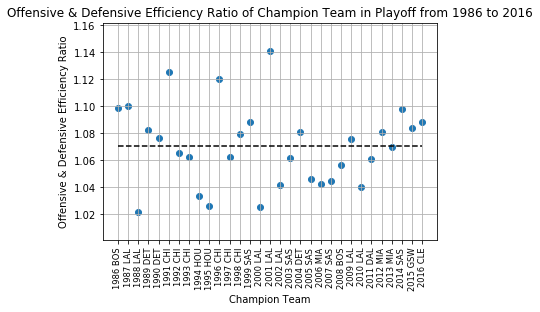

In [29]:
plt.scatter(np.arange(31), list(efficiency['ratio'].values))
plt.hlines(efficiency['ratio'].mean(), 0, 30, linestyles='dashed')
plt.xticks(np.arange(31), champion_teams, size='small', rotation=90)
plt.xlabel('Champion Team')
plt.ylabel('Offensive & Defensive Efficiency Ratio')
plt.title('Offensive & Defensive Efficiency Ratio of Champion Team in Playoff from 1986 to 2016')
plt.grid(True)

#### 得到的信息

加入百回合修正后，可以看到有3支冠军球队的得失分比明显已经高出一个级别。从高到底分别是2001年湖人，1991年公牛，1996年公牛。因此，后续的讨论集中于这三只球队身上。

In [30]:
CHI1991 = team_playoff[(team_playoff['赛季'] == 1991) & (team_playoff['球队'] == 'CHI')]
CHI1996 = team_playoff[(team_playoff['赛季'] == 1996) & (team_playoff['球队'] == 'CHI')]
LAL2001 = team_playoff[(team_playoff['赛季'] == 2001) & (team_playoff['球队'] == 'LAL')]

In [31]:
CHI1991

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,抢断,盖帽,失误,犯规,得分,失分,赛季,回合,百回合得分,百回合失分
49,CHI,1991-04-25,W,主,NYK85-126CHI,0.524,44,84,0.600,6,...,15,0,15,20,126,85,1991,51.54,122.235157,82.460225
50,CHI,1991-04-28,W,主,NYK79-89CHI,0.469,30,64,0.667,2,...,9,5,12,15,89,79,1991,44.04,101.044505,89.691190
51,CHI,1991-04-30,W,客,NYK94-103CHI,0.489,43,88,0.000,0,...,13,4,10,20,103,94,1991,46.42,110.943559,101.249461
52,CHI,1991-05-04,W,主,NAN92-105CHI,0.541,40,74,0.400,2,...,9,4,8,26,105,92,1991,43.54,120.578778,105.649977
53,CHI,1991-05-06,W,主,NAN100-112CHI,0.571,48,84,0.222,2,...,5,3,9,23,112,100,1991,43.66,128.263857,114.521301
54,CHI,1991-05-10,L,客,NAN99-97CHI,0.488,42,86,0.200,1,...,8,5,10,27,97,99,1991,47.38,102.363867,104.474462
55,CHI,1991-05-12,W,客,NAN85-101CHI,0.478,44,92,0.429,3,...,14,2,12,20,101,85,1991,46.92,107.630009,90.579710
56,CHI,1991-05-14,W,主,NAN95-100CHI,0.482,41,85,0.333,2,...,2,1,9,20,100,95,1991,43.50,114.942529,109.195402
57,CHI,1991-05-19,W,主,DET83-94CHI,0.500,33,66,0.200,1,...,11,9,14,25,94,83,1991,42.38,110.901369,97.923549
58,CHI,1991-05-21,W,主,DET97-105CHI,0.486,34,70,0.429,3,...,9,5,15,20,105,97,1991,45.20,116.150442,107.300885


In [32]:
NYK_season_1991 = team_season[(team_season['球队'] == 'NYK') & (team_season['赛季'] == 1991)]
NYK_season_average_1991 = NYK_season_1991.mean()

NYK_playoff_1991 = team_playoff[(team_playoff['球队'] == 'NYK') & (team_playoff['赛季'] == 1991)].tail(3)
NYK_playoff_average_1991 = NYK_playoff_1991.mean()

PHI_season_1991 = team_season[(team_season['球队'] == 'PHI') & (team_season['赛季'] == 1991)]
PHI_season_average_1991 = PHI_season_1991.mean()

PHI_playoff_1991 = team_playoff[(team_playoff['球队'] == 'PHI') & (team_playoff['赛季'] == 1991)].tail(5)
PHI_playoff_average_1991 = PHI_playoff_1991.mean()

DET_season_1991 = team_season[(team_season['球队'] == 'DET') & (team_season['赛季'] == 1991)]
DET_season_average_1991 = DET_season_1991.mean()

DET_playoff_1991 = team_playoff[(team_playoff['球队'] == 'DET') & (team_playoff['赛季'] == 1991)].tail(4)
DET_playoff_average_1991 = DET_playoff_1991.mean()

LAL_season_1991 = team_season[(team_season['球队'] == 'LAL') & (team_season['赛季'] == 1991)]
LAL_season_average_1991 = LAL_season_1991.mean()

LAL_playoff_1991 = team_playoff[(team_playoff['球队'] == 'LAL') & (team_playoff['赛季'] == 1991)].tail(5)
LAL_playoff_average_1991 = LAL_playoff_1991.mean()

total_1991 = [NYK_season_average_1991, NYK_playoff_average_1991, PHI_season_average_1991, PHI_playoff_average_1991, 
              DET_season_average_1991, DET_playoff_average_1991, LAL_season_average_1991, LAL_playoff_average_1991]

In [33]:
season_score_1991 = []
season_loss_1991 = []
playoff_score_1991 = []
playoff_loss_1991 = []

for i in range(len(total_1991)):
    if i % 2 == 0:
        season_score_1991.append(total_1991[i]['百回合得分'])
        season_loss_1991.append(-total_1991[i]['百回合失分'])
    else:
        playoff_score_1991.append(total_1991[i]['百回合得分'])
        playoff_loss_1991.append(-total_1991[i]['百回合失分'])

change1991 = pd.DataFrame({'season_score': season_score_1991, 'season_loss': season_loss_1991, 
                          'playoff_score': playoff_score_1991, 'playoff_loss': playoff_loss_1991})

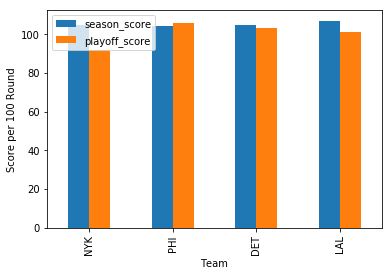

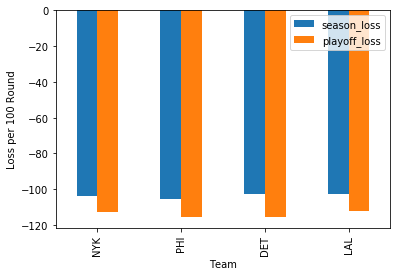

In [34]:
change1991[['season_score', 'playoff_score']].plot(kind='bar')
plt.xticks(np.arange(4), ['NYK', 'PHI', 'DET', 'LAL'])
plt.xlabel('Team')
plt.ylabel('Score per 100 Round')
change1991[['season_loss', 'playoff_loss']].plot(kind='bar')
plt.xticks(np.arange(4), ['NYK', 'PHI', 'DET', 'LAL'])
plt.xlabel('Team')
plt.ylabel('Loss per 100 Round')

In [35]:
season1991 = team_season[team_season['赛季'] == 1991]
season1991_score = season1991['百回合得分'].groupby(season1991['球队']).mean()
season1991_loss = season1991['百回合失分'].groupby(season1991['球队']).mean()
season1991_average = pd.concat([season1991_score, season1991_loss], axis=1)
season1991_average['得失分比'] = season1991_average['百回合得分'] / season1991_average['百回合失分']
season1991_average.sort_values(by='得失分比', ascending=False)

,百回合得分,百回合失分,得失分比
球队,,,
CHI,111.871614,102.006095,1.096715
POR,107.855577,101.012508,1.067745
PHO,108.217723,102.065930,1.060273
LAL,107.074093,102.493616,1.044690
BOS,108.636100,104.262480,1.041948
SAS,102.937346,99.297622,1.036655
UTA,107.385840,103.986636,1.032689
GSW,109.107327,106.162168,1.027742
DET,104.860143,102.594902,1.022079


In [36]:
compare1991 = pd.DataFrame([season_score_1991, season_loss_1991, playoff_score_1991, playoff_loss_1991], 
             index=['season score', 'season loss', 'playoff score', 'playoff loss'], 
            columns=['NYK', 'PHI', 'DET', 'LAL']).T
compare1991['season ratio'] = compare1991['season score'] / (-1 * compare1991['season loss'])
compare1991['playoff ratio'] = compare1991['playoff score'] / (-1 * compare1991['playoff loss'])

compare1991

,season score,season loss,playoff score,playoff loss,season ratio,playoff ratio
NYK,104.743928,-103.932909,91.707724,-112.536806,1.007803,0.814913
PHI,104.452339,-105.302511,105.754095,-115.569478,0.991926,0.915069
DET,104.860143,-102.594902,103.200549,-115.771302,1.022079,0.891417
LAL,107.074093,-102.493616,101.104643,-112.155143,1.044690,0.901471


#### 得到的信息

* 按得失分比排名，尼克斯赛季排名第13，76人赛季排名第16，活塞赛季排名第9，湖人赛季排名第4
* 与该赛季冠军交手的系列赛，得失分比均跌破最后一名
* 4支队伍的季后赛得失分统计数据中，仅有76人队的百回合得分一项统计表现好于赛季水平

In [37]:
CHI1996

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,抢断,盖帽,失误,犯规,得分,失分,赛季,回合,百回合得分,百回合失分
127,CHI,1996-04-26,W,主,MIA85-102CHI,0.500,37,74,0.176,3,...,14,4,19,24,102,85,1996,48.18,105.853051,88.210876
128,CHI,1996-04-28,W,主,MIA75-106CHI,0.534,39,73,0.333,7,...,9,3,14,29,106,75,1996,46.36,114.322692,80.888697
129,CHI,1996-05-01,W,客,MIA91-112CHI,0.500,40,80,0.400,8,...,8,3,12,17,112,91,1996,44.22,126.639530,102.894618
130,CHI,1996-05-05,W,主,NYK84-91CHI,0.379,33,87,0.158,3,...,8,4,8,23,91,84,1996,44.14,103.081106,95.151790
131,CHI,1996-05-07,W,主,NYK80-91CHI,0.407,35,86,0.333,7,...,9,6,17,26,91,80,1996,46.60,97.639485,85.836910
132,CHI,1996-05-11,L,客,NYK102-99CHI,0.413,38,92,0.333,7,...,12,2,13,28,99,102,1996,51.14,96.793117,99.726242
133,CHI,1996-05-12,W,客,NYK91-94CHI,0.407,33,81,0.300,6,...,7,6,15,28,94,91,1996,43.34,108.444855,104.983849
134,CHI,1996-05-14,W,主,NYK81-94CHI,0.436,34,78,0.455,5,...,9,2,12,28,94,81,1996,44.26,106.190691,91.504745
135,CHI,1996-05-19,W,主,ORL83-121CHI,0.552,53,96,0.368,7,...,12,2,13,22,121,83,1996,47.54,127.261254,87.294910
136,CHI,1996-05-21,W,主,ORL88-93CHI,0.400,30,75,0.263,5,...,12,2,7,21,93,88,1996,40.72,114.194499,108.055010


In [38]:
MIA_season_1996 = team_season[(team_season['球队'] == 'MIA') & (team_season['赛季'] == 1996)]
MIA_season_average_1996 = MIA_season_1996.mean()

MIA_playoff_1996 = team_playoff[(team_playoff['球队'] == 'MIA') & (team_playoff['赛季'] == 1996)].tail(3)
MIA_playoff_average_1996 = MIA_playoff_1996.mean()

NYK_season_1996 = team_season[(team_season['球队'] == 'NYK') & (team_season['赛季'] == 1996)]
NYK_season_average_1996 = NYK_season_1996.mean()

NYK_playoff_1996 = team_playoff[(team_playoff['球队'] == 'NYK') & (team_playoff['赛季'] == 1996)].tail(5)
NYK_playoff_average_1996 = NYK_playoff_1996.mean()

ORL_season_1996 = team_season[(team_season['球队'] == 'ORL') & (team_season['赛季'] == 1996)]
ORL_season_average_1996 = ORL_season_1996.mean()

ORL_playoff_1996 = team_playoff[(team_playoff['球队'] == 'ORL') & (team_playoff['赛季'] == 1996)].tail(4)
ORL_playoff_average_1996 = ORL_playoff_1996.mean()

total_1996 = [MIA_season_average_1996, MIA_playoff_average_1996, NYK_season_average_1996, NYK_playoff_average_1996, 
             ORL_season_average_1996, ORL_playoff_average_1996]

In [39]:
CHI1996.tail(6)['百回合得分'].mean()

104.90709999323673

In [40]:
CHI1996.tail(6)['百回合失分'].mean()

100.55187453149604

#### 西雅图超音速队统计数据缺失，手动计算后在此记录，数据来源http://www.stat-nba.com/team/SEA.html

**常规赛表现**
* 百回合得分 `104.5 / (2 * 48.594) * 100 = 107.523563`
* 百回合失分 `96.7 / (2 * 48.594) * 100 = 99.497880`
* 得失分比 `1.080662`
* 回合数 `48.594`

**与公牛队季后赛交手表现**
* 百回合得分 `100.551875`
* 百回合失分 `104.907100`
* 得失分比 `0.958485`

In [41]:
season_score_1996 = []
season_loss_1996 = []
playoff_score_1996 = []
playoff_loss_1996 = []

for i in range(len(total_1996)):
    if i % 2 == 0:
        season_score_1996.append(total_1996[i]['百回合得分'])
        season_loss_1996.append(-total_1996[i]['百回合失分'])
    else:
        playoff_score_1996.append(total_1996[i]['百回合得分'])
        playoff_loss_1996.append(-total_1996[i]['百回合失分'])

season_score_1996.append(107.523563)
season_loss_1996.append(-99.497880)
playoff_score_1996.append(100.551875)
playoff_loss_1996.append(-104.907100)

change1996 = pd.DataFrame({'season_score': season_score_1996, 'season_loss': season_loss_1996, 
                          'playoff_score': playoff_score_1996, 'playoff_loss': playoff_loss_1996})

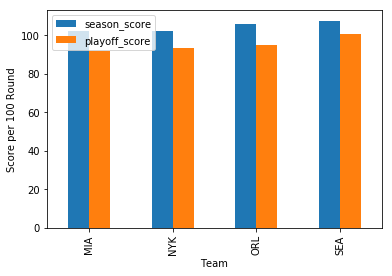

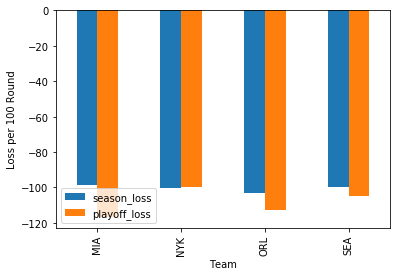

In [42]:
change1996[['season_score', 'playoff_score']].plot(kind='bar')
plt.xticks(np.arange(4), ['MIA', 'NYK', 'ORL', 'SEA'])
plt.xlabel('Team')
plt.ylabel('Score per 100 Round')
change1996[['season_loss', 'playoff_loss']].plot(kind='bar')
plt.xticks(np.arange(4), ['MIA', 'NYK', 'ORL', 'SEA'])
plt.xlabel('Team')
plt.ylabel('Loss per 100 Round')

In [43]:
season1996 = team_season[team_season['赛季'] == 1996]
season1996_score = season1996['百回合得分'].groupby(season1996['球队']).mean()
season1996_loss = season1996['百回合失分'].groupby(season1996['球队']).mean()
season1996_average = pd.concat([season1996_score, season1996_loss], axis=1).T
season1996_average['SEA'] = [107.523563, 99.497880]
season1996_average = season1996_average.T
season1996_average['得失分比'] = season1996_average['百回合得分'] / season1996_average['百回合失分']
season1996_average.sort_values(by='得失分比', ascending=False)

,百回合得分,百回合失分,得失分比
球队,,,
CHI,110.952449,96.990145,1.143956
SEA,107.523563,99.497880,1.080662
UTA,108.769679,101.149083,1.075340
LAL,108.040588,102.544724,1.053595
CLE,107.389830,102.011135,1.052727
DET,107.007838,102.242544,1.046608
POR,102.894566,99.087515,1.038421
IND,104.571531,101.091640,1.034423
MIA,102.203071,98.830643,1.034123


In [44]:
compare1996 = pd.DataFrame([season_score_1996, season_loss_1996, playoff_score_1996, playoff_loss_1996], 
             index=['season score', 'season loss', 'playoff score', 'playoff loss'], 
            columns=['MIA', 'NYK', 'ORL', 'SEA']).T
compare1996['season ratio'] = compare1996['season score'] / (-1 * compare1996['season loss'])
compare1996['playoff ratio'] = compare1996['playoff score'] / (-1 * compare1996['playoff loss'])

compare1996

,season score,season loss,playoff score,playoff loss,season ratio,playoff ratio
MIA,102.203071,-98.830643,91.676486,-116.886887,1.034123,0.784318
NYK,101.939777,-100.094551,93.316477,-100.028099,1.018435,0.932903
ORL,105.695658,-103.414327,94.597911,-112.901279,1.022060,0.837882
SEA,107.523563,-99.497880,100.551875,-104.907100,1.080662,0.958485


#### 得到的信息

* 按得失分比排名，热火队排名第9，尼克斯队排名第13，魔术队排名第11，超音速队排名第2
* 与该赛季冠军公牛队交手的系列赛，热火队与魔术队跌破赛季最低水平，尼克斯队跌落到相当于赛季倒数第3水平，超音速跌落到相当于赛季倒数第7水平

In [45]:
LAL2001

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,抢断,盖帽,失误,犯规,得分,失分,赛季,回合,百回合得分,百回合失分
1707,LAL,2001-04-22,W,主,POR93-106LAL,0.437,38,87,0.316,6,...,11,3,8,26,106,93,2001,46.60,113.733906,99.785408
1708,LAL,2001-04-26,W,主,POR88-106LAL,0.483,43,89,0.273,6,...,11,1,15,25,106,88,2001,49.38,107.330903,89.104901
1709,LAL,2001-04-29,W,客,POR86-99LAL,0.444,36,81,0.211,4,...,8,2,12,17,99,86,2001,47.82,103.513174,89.920535
1710,LAL,2001-05-06,W,主,SAC105-108LAL,0.483,42,87,0.250,3,...,12,10,15,21,108,105,2001,49.36,109.400324,106.361426
1711,LAL,2001-05-08,W,主,SAC90-96LAL,0.456,36,79,0.000,0,...,8,4,17,28,96,90,2001,48.94,98.079281,91.949326
1712,LAL,2001-05-11,W,客,SAC81-103LAL,0.467,35,75,0.385,5,...,12,3,14,23,103,81,2001,50.16,102.671451,80.741627
1713,LAL,2001-05-13,W,客,SAC113-119LAL,0.500,39,78,0.500,6,...,7,5,15,25,119,113,2001,48.02,123.906706,117.659309
1714,LAL,2001-05-19,W,客,SAS90-104LAL,0.471,41,87,0.500,7,...,12,6,14,20,104,90,2001,49.32,105.433901,91.240876
1715,LAL,2001-05-21,W,客,SAS81-88LAL,0.443,35,79,0.444,8,...,9,5,7,19,88,81,2001,42.64,103.189493,94.981238
1716,LAL,2001-05-25,W,主,SAS72-111LAL,0.478,44,92,0.389,7,...,6,5,15,21,111,72,2001,48.44,114.574732,74.318745


In [46]:
POR_season_2001 = team_season[(team_season['球队'] == 'POR') & (team_season['赛季'] == 2001)]
POR_season_average_2001 = POR_season_2001.mean()

POR_playoff_2001 = team_playoff[(team_playoff['球队'] == 'POR') & (team_playoff['赛季'] == 2001)].tail(3)
POR_playoff_average_2001 = POR_playoff_2001.mean()

SAC_season_2001 = team_season[(team_season['球队'] == 'SAC') & (team_season['赛季'] == 2001)]
SAC_season_average_2001 = SAC_season_2001.mean()

SAC_playoff_2001 = team_playoff[(team_playoff['球队'] == 'SAC') & (team_playoff['赛季'] == 2001)].tail(4)
SAC_playoff_average_2001 = SAC_playoff_2001.mean()

SAS_season_2001 = team_season[(team_season['球队'] == 'SAS') & (team_season['赛季'] == 2001)]
SAS_season_average_2001 = SAS_season_2001.mean()

SAS_playoff_2001 = team_playoff[(team_playoff['球队'] == 'SAS') & (team_playoff['赛季'] == 2001)].tail(4)
SAS_playoff_average_2001 = SAS_playoff_2001.mean()

PHI_season_2001 = team_season[(team_season['球队'] == 'PHI') & (team_season['赛季'] == 2001)]
PHI_season_average_2001 = PHI_season_2001.mean()

PHI_playoff_2001 = team_playoff[(team_playoff['球队'] == 'PHI') & (team_playoff['赛季'] == 2001)].tail(5)
PHI_playoff_average_2001 = PHI_playoff_2001.mean()

total_2001 = [POR_season_average_2001, POR_playoff_average_2001, SAC_season_average_2001, SAC_playoff_average_2001, 
              SAS_season_average_2001, SAS_playoff_average_2001, PHI_season_average_2001, PHI_playoff_average_2001]

In [47]:
season_score_2001 = []
season_loss_2001 = []
playoff_score_2001 = []
playoff_loss_2001 = []

for i in range(len(total_2001)):
    if i % 2 == 0:
        season_score_2001.append(total_2001[i]['百回合得分'])
        season_loss_2001.append(-total_2001[i]['百回合失分'])
    else:
        playoff_score_2001.append(total_2001[i]['百回合得分'])
        playoff_loss_2001.append(-total_2001[i]['百回合失分'])

change2001 = pd.DataFrame({'season_score': season_score_2001, 'season_loss': season_loss_2001, 
                          'playoff_score': playoff_score_2001, 'playoff_loss': playoff_loss_2001})

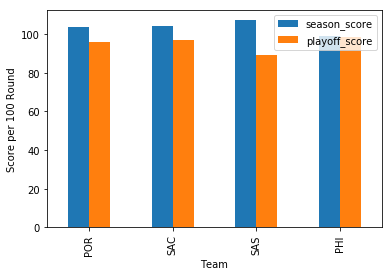

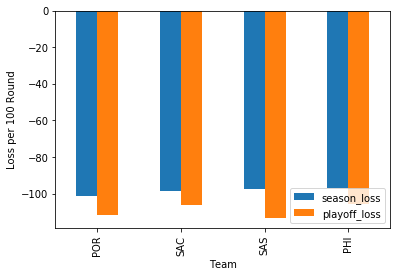

In [48]:
change2001[['season_score', 'playoff_score']].plot(kind='bar')
plt.xticks(np.arange(4), ['POR', 'SAC', 'SAS', 'PHI'])
plt.xlabel('Team')
plt.ylabel('Score per 100 Round')
change2001[['season_loss', 'playoff_loss']].plot(kind='bar')
plt.xticks(np.arange(4), ['POR', 'SAC', 'SAS', 'PHI'])
plt.xlabel('Team')
plt.ylabel('Loss per 100 Round')

In [49]:
season2001 = team_season[team_season['赛季'] == 2001]
season2001_score = season2001['百回合得分'].groupby(season2001['球队']).mean()
season2001_loss = season2001['百回合失分'].groupby(season2001['球队']).mean()
season2001_average = pd.concat([season2001_score, season2001_loss], axis=1)
season2001_average['得失分比'] = season2001_average['百回合得分'] / season2001_average['百回合失分']
season2001_average.sort_values(by='得失分比', ascending=False)

,百回合得分,百回合失分,得失分比
球队,,,
SAS,107.282984,97.465247,1.100731
SAC,104.004955,98.733000,1.053396
LAL,105.394416,100.397750,1.049769
DAL,106.324606,101.454038,1.048008
MIL,106.563247,102.227120,1.042417
MIN,104.973090,101.032293,1.039005
UTA,103.981173,100.745505,1.032117
PHO,99.833937,97.265492,1.026407
POR,103.646211,101.256036,1.023605


In [50]:
compare2001 = pd.DataFrame([season_score_2001, season_loss_2001, playoff_score_2001, playoff_loss_2001], 
             index=['season score', 'season loss', 'playoff score', 'playoff loss'], 
            columns=['POR', 'SAC', 'SAS', 'PHI']).T
compare2001['season ratio'] = compare2001['season score'] / (-1 * compare2001['season loss'])
compare2001['playoff ratio'] = compare2001['playoff score'] / (-1 * compare2001['playoff loss'])

compare2001

,season score,season loss,playoff score,playoff loss,season ratio,playoff ratio
POR,103.646211,-101.256036,95.748587,-111.512880,1.023605,0.858633
SAC,104.004955,-98.733000,97.026904,-106.163406,1.053396,0.913939
SAS,107.282984,-97.465247,89.096399,-113.238902,1.100731,0.786800
PHI,99.273478,-96.999128,98.461379,-105.870506,1.023447,0.930017


#### 得到的信息

* 在三支冠军队中，2001湖人队是唯一一支不是当赛季常规赛冠军的球队
* 按得失分比排名，开拓者队排名第9，国王队排名第2，马刺队排名第1，76人队排名第10
* 与湖人队交手的系列赛，开拓者队与马刺队得失分比跌破常规赛最差水准，国王队跌落至倒数第2水平，76人队跌落至倒数第3水平

### 结论

* 如果不参考常规赛战绩，仅以季后赛夺冠历程而论，2001年湖人是最强的冠军球队，不论是胜率还是对手在当赛季所处水平，都是3支队伍中最有说服力的
* 如果参考常规赛战绩，则1996公牛更占优势，是唯一一支在当赛季进攻与防守均排第一的球队